PARAMETERS


In [2]:
import pandas as pd
import glob
import os

# Specify the path where the CSV files are located
path = "/content/"  # Adjust this path based on where your files are located

# Get a list of all CSV files in the specified path
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Read all CSV files into a single DataFrame
dataframes = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Add a simulation identifier to track which simulation each row belongs to
combined_df['simulation_id'] = combined_df.index // len(dataframes[0])

# Display the first few rows of the combined DataFrame
combined_df.head()


,SLOW?,Reward Earned,Reward Cost,Gas Cost,Total Neighbours,Slow Neighbours,simulation_id
0,0,137.50000,700,0,5,0.000000,0
1,1,0.00000,0,4,8,0.125000,0
2,0,492.18750,500,1,8,0.375000,0
3,0,88.28125,600,0,7,0.428571,0
4,0,28.12500,400,0,6,0.833333,0


In [3]:
# Calculate average values for each metric
avg_values = combined_df.groupby('simulation_id').mean()

# Print out the averages
print(avg_values)

# Overall averages across all simulations
overall_averages = avg_values.mean()
print(f"Overall Averages:\n{overall_averages}")


               SLOW?  Reward Earned  Reward Cost  Gas Cost  Total Neighbours  \
simulation_id                                                                  
0               0.29     114.132812        430.0      0.48              5.90   
1               0.24     154.781250        567.0      0.68              6.18   
2               0.76       6.500000         13.0      0.52              6.26   
3               0.20       0.000000          0.0      0.00              6.04   
4               0.34     102.140625        414.0      0.27              6.08   
5               0.28     217.015625        874.0      0.59              6.18   
6               0.25     215.742188        869.0      0.90              5.98   
7               0.28     151.687500        592.0      0.56              6.04   

               Slow Neighbours  
simulation_id                   
0                     0.298929  
1                     0.232595  
2                     0.760024  
3                     0.190333  
4

                     SLOW?  Reward Earned  Reward Cost  Gas Cost  \
SLOW?             1.000000      -0.484736    -0.482342  0.048735   
Reward Earned    -0.484736       1.000000     0.998133  0.747019   
Reward Cost      -0.482342       0.998133     1.000000  0.730796   
Gas Cost          0.048735       0.747019     0.730796  1.000000   
Total Neighbours  0.580541      -0.177732    -0.184143  0.052909   
Slow Neighbours   0.998354      -0.468589    -0.467160  0.070889   

                  Total Neighbours  Slow Neighbours  
SLOW?                     0.580541         0.998354  
Reward Earned            -0.177732        -0.468589  
Reward Cost              -0.184143        -0.467160  
Gas Cost                  0.052909         0.070889  
Total Neighbours          1.000000         0.567711  
Slow Neighbours           0.567711         1.000000  


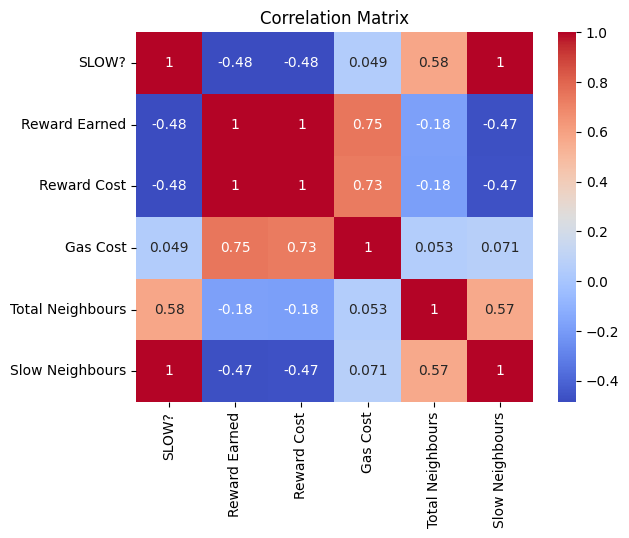

In [4]:
# Correlation analysis
correlation_matrix = avg_values.corr()
print(correlation_matrix)

# Visualization of correlations
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


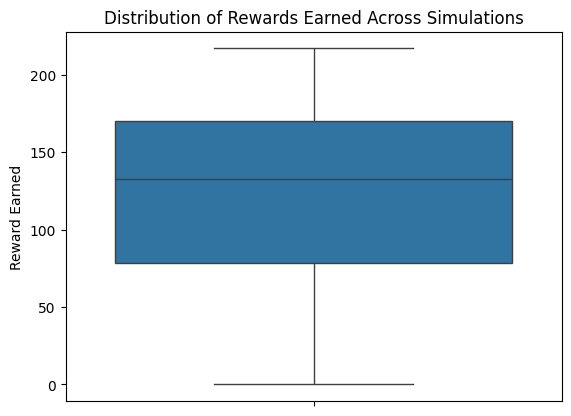

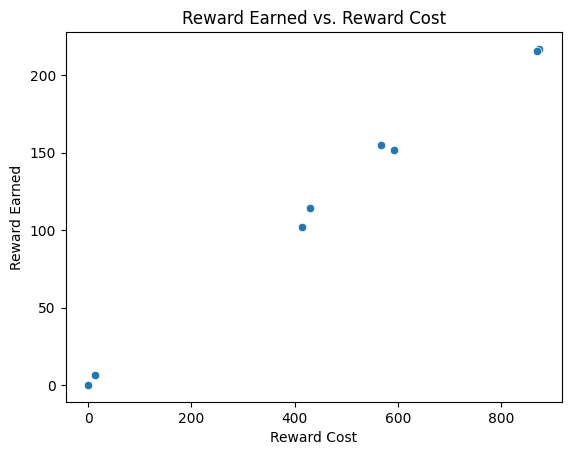

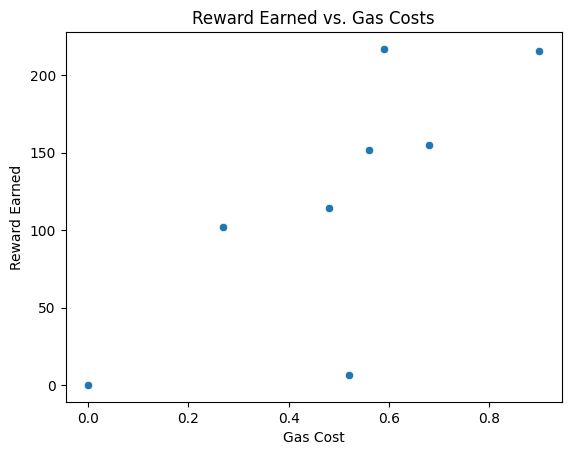

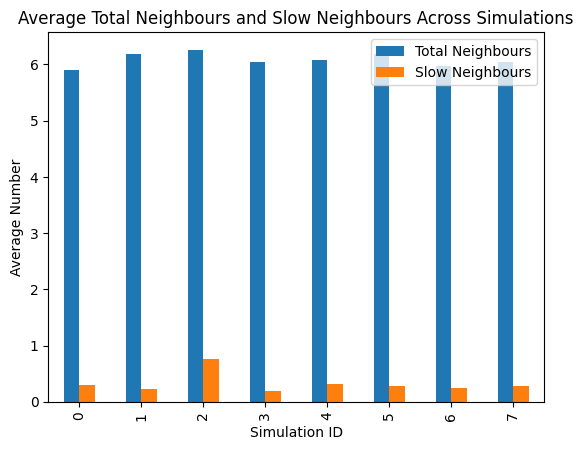

In [5]:
# Box plot of rewards earned across simulations
sns.boxplot(data=avg_values, y='Reward Earned')
plt.title('Distribution of Rewards Earned Across Simulations')
plt.show()

# Scatter plot of reward earned vs. reward cost
sns.scatterplot(data=avg_values, x='Reward Cost', y='Reward Earned')
plt.title('Reward Earned vs. Reward Cost')
plt.xlabel('Reward Cost')
plt.ylabel('Reward Earned')
plt.show()

# Scatter plot of reward earned vs. gas fees
sns.scatterplot(data=avg_values, x='Gas Cost', y='Reward Earned')
plt.title('Reward Earned vs. Gas Costs')
plt.xlabel('Gas Cost')
plt.ylabel('Reward Earned')
plt.show()

# Bar plot of average total neighbors and slow neighbors
avg_values[['Total Neighbours', 'Slow Neighbours']].plot(kind='bar')
plt.title('Average Total Neighbours and Slow Neighbours Across Simulations')
plt.xlabel('Simulation ID')
plt.ylabel('Average Number')
plt.show()


///

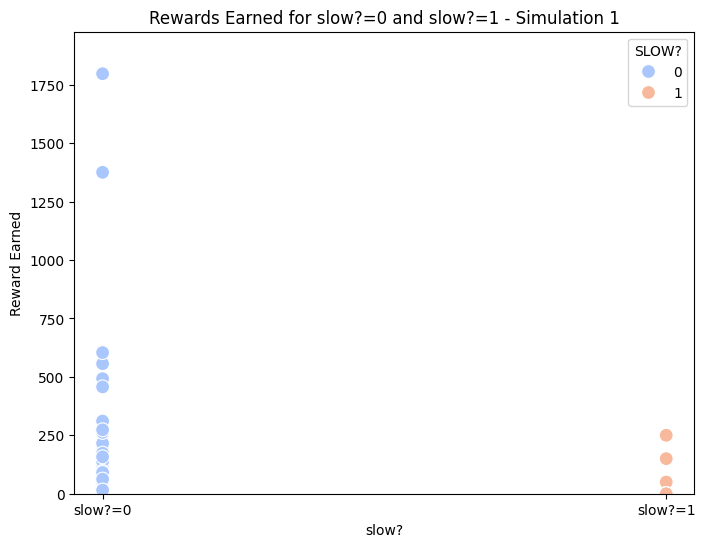

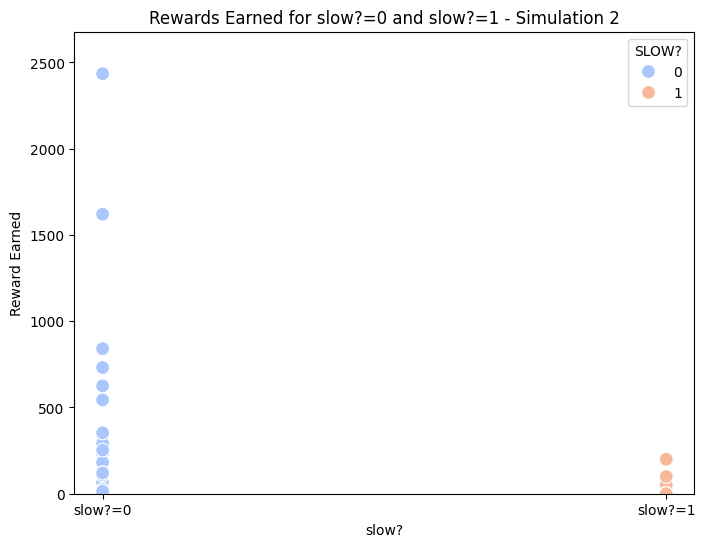

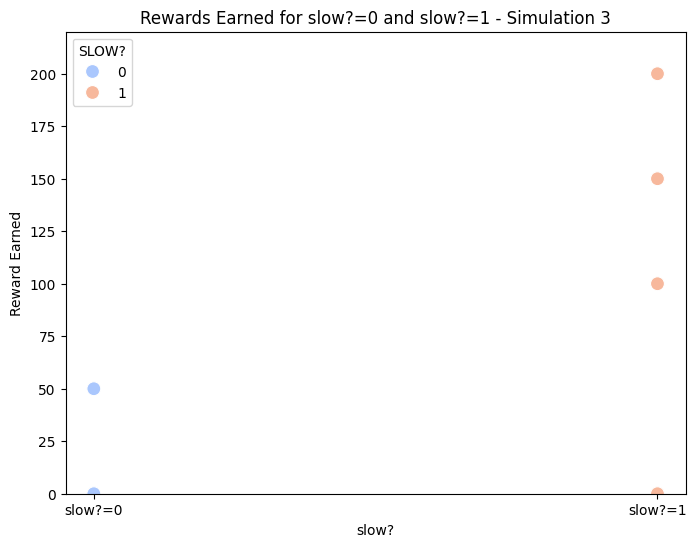

<ipython-input-11-53fd773984ab>:25: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, df['Reward Earned'].max() * 1.1)  # Add some space above the points


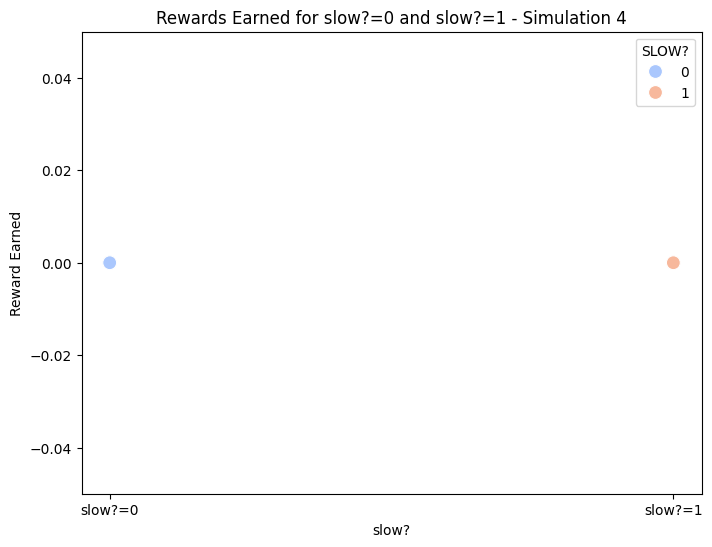

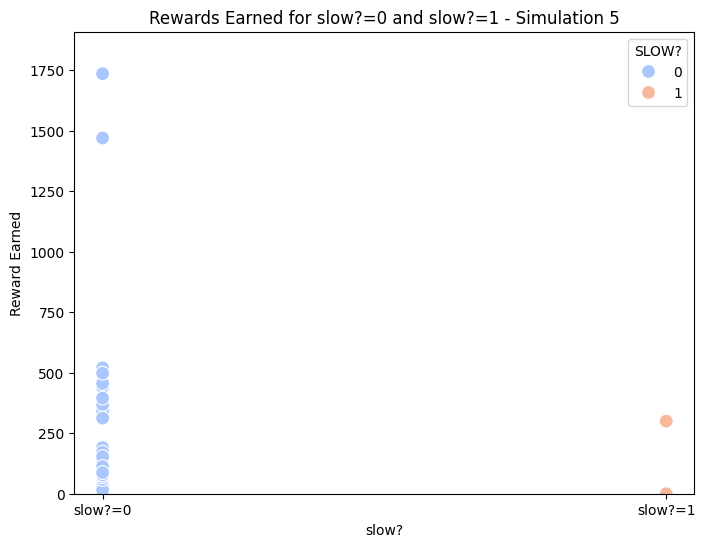

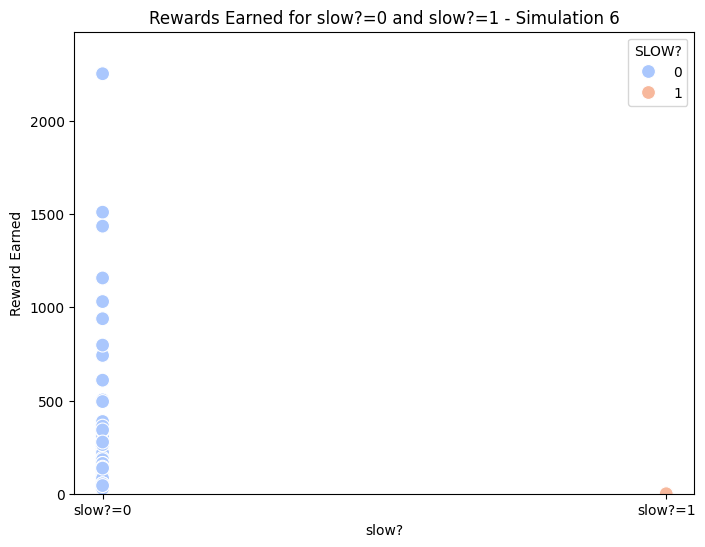

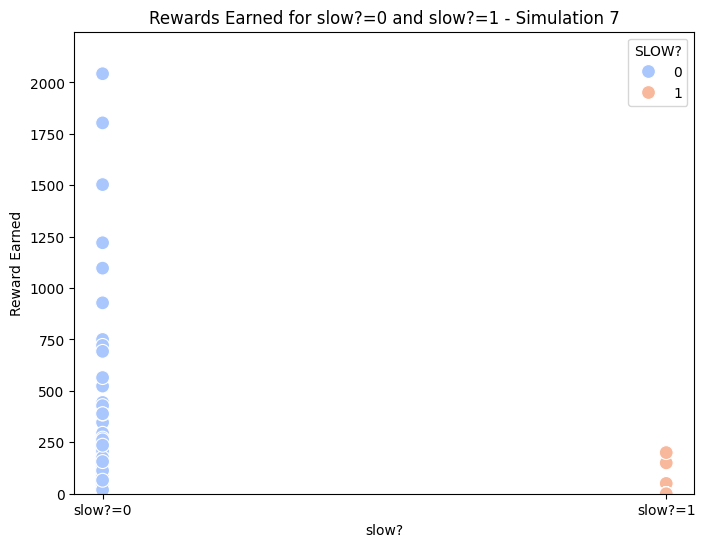

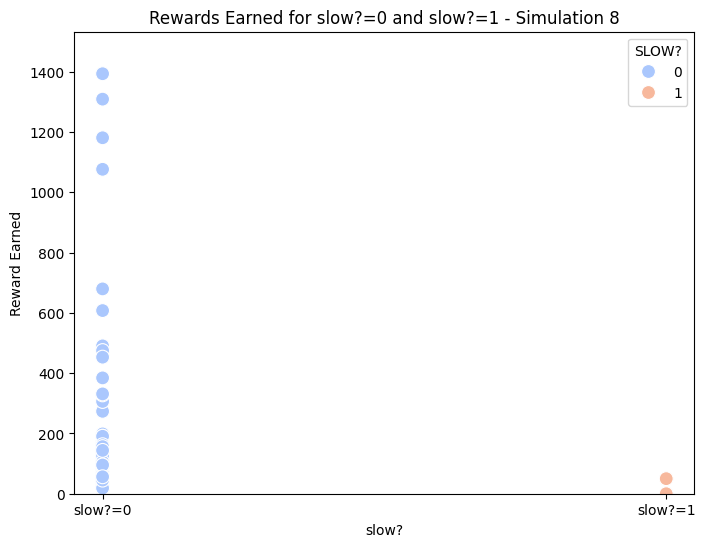

In [11]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the path where the CSV files are located
path = "/content/"  # Adjust this path based on where your files are located

# Get a list of all CSV files in the specified path
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Loop through each CSV file to create individual plots
for i, file in enumerate(csv_files):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='SLOW?', y='Reward Earned', hue='SLOW?', palette='coolwarm', s=100)
    plt.title(f'Rewards Earned for slow?=0 and slow?=1 - Simulation {i+1}')
    plt.xlabel('slow?')
    plt.ylabel('Reward Earned')
    plt.xticks(ticks=[0, 1], labels=['slow?=0', 'slow?=1'])
    plt.ylim(0, df['Reward Earned'].max() * 1.1)  # Add some space above the points

    # Show the plot
    plt.show()
